In [1]:
import tensorflow as tf
import tensorflow_hub as hub
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [4]:
# !wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip

In [5]:
# ! unzip 10_food_classes_10_percent.zip

In [6]:
TRAIN_PATH = "10_food_classes_10_percent/train"
TEST_PATH = "10_food_classes_10_percent/test"

In [7]:
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

train_data = train_datagen.flow_from_directory(TRAIN_PATH,
                                              target_size=(224,224),
                                              batch_size=32,
                                              class_mode="categorical")
test_data = test_datagen.flow_from_directory(TEST_PATH,
                                            target_size=(224,224),
                                            batch_size=32,
                                            class_mode="categorical")

Found 750 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


In [8]:
# popular callbacks-
# tensorboard
# model checkpoint
# early stopping

In [9]:
# tensorboard callback
import datetime
def create_tensorboard_callback(dir_name, experiment_name):
    log_dir = dir_name + "/" + experiment_name + "/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
    tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir)
    print(f"Saving tensorboard logs to {log_dir}")
    return tensorboard_callback

In [10]:
resnet_url = "https://tfhub.dev/google/imagenet/resnet_v2_50/feature_vector/5"
efficientnet_url = "https://tfhub.dev/google/efficientnet/b0/feature-vector/1"

In [11]:
def create_model(model_url, num_classes=10):
    base = hub.KerasLayer(model_url,
                         trainable=False,
                         name="base",
                         input_shape=(224,224,3),)
    model = tf.keras.models.Sequential()
    model.add(base)
    model.add(tf.keras.layers.Dense(10, activation="softmax", name="output_layer"))
    return model

In [12]:
resnet_model = create_model(resnet_url, 10)

In [13]:
resnet_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 base (KerasLayer)           (None, 2048)              23564800  
                                                                 
 output_layer (Dense)        (None, 10)                20490     
                                                                 
Total params: 23,585,290
Trainable params: 20,490
Non-trainable params: 23,564,800
_________________________________________________________________


In [14]:
resnet_model.compile(loss="categorical_crossentropy",
                    optimizer="adam",
                    metrics=["accuracy"])

In [16]:
resnet_history = resnet_model.fit(train_data,
                                 epochs=5,
                                 validation_data=test_data,
                                 callbacks=[create_tensorboard_callback(dir_name="tensorflow_hub", experiment_name="resnet50V2")])

Saving tensorboard logs to tensorflow_hub/resnet50V2/20230221-191954
Epoch 1/5
24/24 [==============================] - 19s 792ms/step - loss: 0.5981 - accuracy: 0.8387 - val_loss: 0.7665 - val_accuracy: 0.7440
Epoch 2/5
24/24 [==============================] - 18s 769ms/step - loss: 0.4657 - accuracy: 0.8840 - val_loss: 0.7054 - val_accuracy: 0.7664
Epoch 3/5
24/24 [==============================] - 18s 783ms/step - loss: 0.3731 - accuracy: 0.9253 - val_loss: 0.6763 - val_accuracy: 0.7752
Epoch 4/5
24/24 [==============================] - 18s 781ms/step - loss: 0.3052 - accuracy: 0.9467 - val_loss: 0.6685 - val_accuracy: 0.7772
Epoch 5/5
24/24 [==============================] - 19s 799ms/step - loss: 0.2555 - accuracy: 0.9600 - val_loss: 0.6600 - val_accuracy: 0.7780


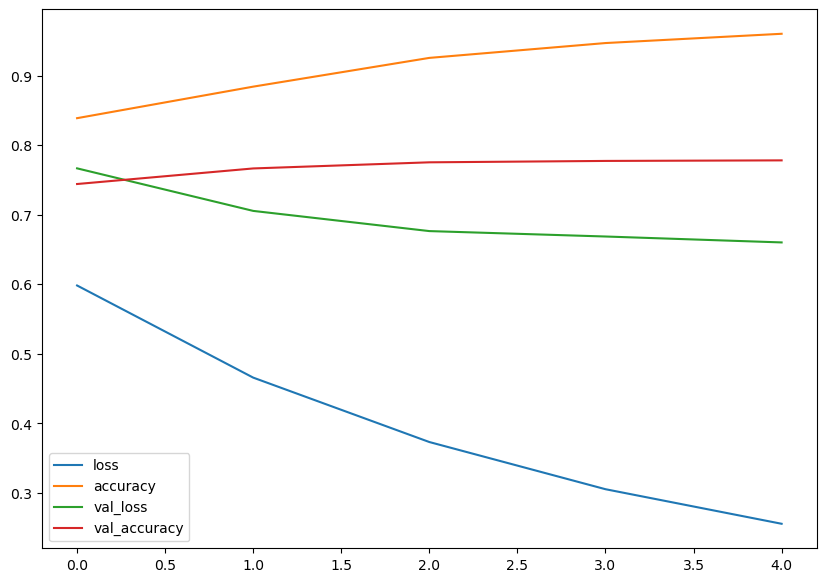

In [17]:
pd.DataFrame(resnet_history.history).plot(figsize=(10,7))
plt.show()

In [18]:
efficientnet_model = create_model(efficientnet_url, 10)

In [19]:
efficientnet_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 base (KerasLayer)           (None, 1280)              4049564   
                                                                 
 output_layer (Dense)        (None, 10)                12810     
                                                                 
Total params: 4,062,374
Trainable params: 12,810
Non-trainable params: 4,049,564
_________________________________________________________________


In [20]:
efficientnet_model.compile(loss="categorical_crossentropy",
                    optimizer="adam",
                    metrics=["accuracy"])

In [21]:
efficientnet_history = efficientnet_model.fit(train_data,
                                 epochs=5,
                                 validation_data=test_data,
                                 callbacks=[create_tensorboard_callback(dir_name="tensorflow_hub", experiment_name="efficientnet")])

Saving tensorboard logs to tensorflow_hub/efficientnet/20230221-192135
Epoch 1/5
24/24 [==============================] - 32s 1s/step - loss: 1.8238 - accuracy: 0.4613 - val_loss: 1.2702 - val_accuracy: 0.7528
Epoch 2/5
24/24 [==============================] - 17s 741ms/step - loss: 1.0460 - accuracy: 0.7787 - val_loss: 0.8439 - val_accuracy: 0.8372
Epoch 3/5
24/24 [==============================] - 17s 731ms/step - loss: 0.7434 - accuracy: 0.8440 - val_loss: 0.6830 - val_accuracy: 0.8480
Epoch 4/5
24/24 [==============================] - 17s 751ms/step - loss: 0.5975 - accuracy: 0.8680 - val_loss: 0.5961 - val_accuracy: 0.8584
Epoch 5/5
24/24 [==============================] - 24s 1s/step - loss: 0.5051 - accuracy: 0.8880 - val_loss: 0.5438 - val_accuracy: 0.8676


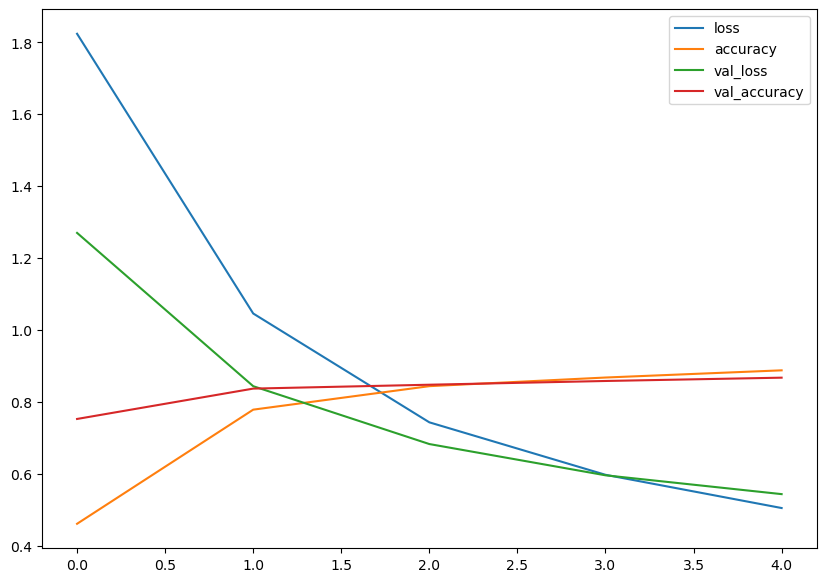

In [22]:
pd.DataFrame(efficientnet_history.history).plot(figsize=(10,7))
plt.show()

In [23]:
# Types of transfer learning-
# 1. As is -> Fit the pretrained model directly.
# 2. Feature extraction -> Adding some layers to the pretrained model and training the extra added layers only.
# 3 Fine tuning -> Taking a pretrained model, adding some layers to it and then training all, or some layers of the model.